In [ ]:
#!pip install pandas statsmodels

In [2]:
import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt


In [3]:
# Carregar os dados
data = pd.read_excel("BAse_Hist_eNPS.xlsx")

In [4]:
#data = data.drop(['Meses'],axis=1,inplace=False)

In [ ]:
data

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


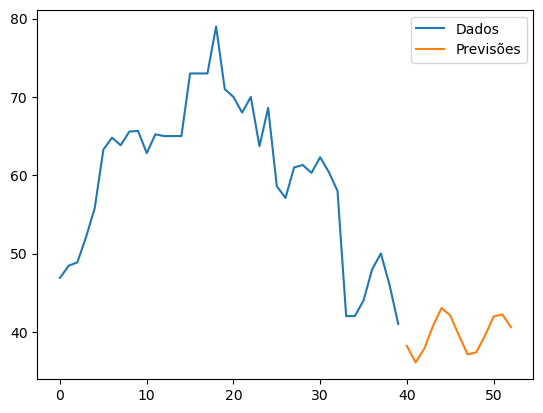

[38.19717249 36.080688   37.81951319 40.71508508 43.04315544 42.09527851
 39.56250632 37.10638931 37.38119246 39.4822719  41.94518845 42.22576935
 40.58855799]


In [18]:

# Decompor a série temporal em seus componentes

decomp = seasonal_decompose(data["eNPS"], period=12)  # Para sazonalidade anual

# Supondo que você tenha determinado os valores de p, d e q através de análise ou métodos:
p = 4
d = 1
q = 3

# Agora você pode criar o modelo ARIMA:
model = ARIMA(decomp.observed, order=(p, d, q))
results = model.fit()


# Estimar o modelo ARIMA
model = ARIMA(decomp.observed, order=(p, d, q))

#model = sm.tsa.ARIMA(decomp.observed, order=(p, d, q))
results = model.fit()

# Prever os próximos 6 meses
predictions = results.predict(start=data.shape[0], end=data.shape[0] + 12)

# Obter os valores da previsão
valores_previsao = predictions.values

# Visualizar as previsões
plt.plot(data["eNPS"], label="Dados")
plt.plot(predictions, label="Previsões")
plt.legend()
plt.show()
print(valores_previsao)
